In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sz
import pandas as pd
import pandas as pd
from scapy.all import rdpcap
from tueplots import bundles
from tueplots.constants.color import rgb
from matplotlib.colors import LinearSegmentedColormap
import chardet


In [6]:
csv_path = "C:\\Users\Philipp\OneDrive - UT Cloud\Data_literacy_mensa\Mensa_10-01-24\csv\wednesday_wireshark.csv"

# with open(csv_path, 'rb') as f:
#    result = chardet.detect(f.read())
# 
# print(result['encoding'])

df_all = pd.read_csv(csv_path, encoding='cp1252')

df_all

,No.,Time,Source,Destination,Protocol,Length,SSID
0,1,"2024-01-10 09:01:07,758711",00:f6:63:81:c8:6b,ff:ff:ff:ff:ff:ff,802.11,298,"""UTguest"""
1,2,"2024-01-10 09:01:07,784807",NaN,NaN,802.11,39,NaN
2,3,"2024-01-10 09:01:07,794917",50:ed:3c:13:d7:4d,00:f6:63:81:c8:6f,802.11,43,NaN
3,4,"2024-01-10 09:01:07,795010",NaN,NaN,802.11,29,NaN
4,5,"2024-01-10 09:01:07,795542",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,286,"""Guest"""
...,...,...,...,...,...,...,...
15338369,15338370,"2024-01-10 11:59:52,317226",NaN,NaN,802.11,35,NaN
15338370,15338371,"2024-01-10 11:59:52,317274",NaN,NaN,802.11,29,NaN
15338371,15338372,"2024-01-10 11:59:52,317323",NaN,NaN,802.11,33,NaN
15338372,15338373,"2024-01-10 11:59:52,317375",NaN,NaN,802.11,47,NaN


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

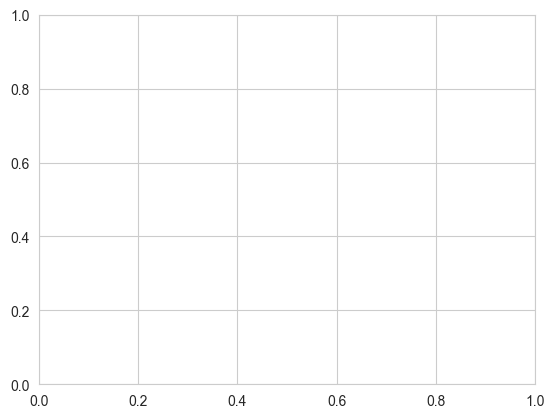

In [7]:
df_all["Time"] = df_all["Time"].str.replace(r':\d+\.\d+', '', regex=True)
df_all["Time"].value_counts().sort_index().plot(kind='density')


In [8]:
df_all['date-time'] = pd.to_datetime(df_all['Time'].str.replace('W. Europe Standard Time', 'CET'), format='%Y-%m-%d %H:%M:%S,%f')
df_all['hour:minute'] = df_all['date-time'].dt.strftime('%H:%M')
df_all

,No.,Time,Source,Destination,Protocol,Length,SSID,date-time,hour:minute
0,1,"2024-01-10 09:01:07,758711",00:f6:63:81:c8:6b,ff:ff:ff:ff:ff:ff,802.11,298,"""UTguest""",2024-01-10 09:01:07.758711,09:01
1,2,"2024-01-10 09:01:07,784807",NaN,NaN,802.11,39,NaN,2024-01-10 09:01:07.784807,09:01
2,3,"2024-01-10 09:01:07,794917",50:ed:3c:13:d7:4d,00:f6:63:81:c8:6f,802.11,43,NaN,2024-01-10 09:01:07.794917,09:01
3,4,"2024-01-10 09:01:07,795010",NaN,NaN,802.11,29,NaN,2024-01-10 09:01:07.795010,09:01
4,5,"2024-01-10 09:01:07,795542",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,286,"""Guest""",2024-01-10 09:01:07.795542,09:01
...,...,...,...,...,...,...,...,...,...
15338369,15338370,"2024-01-10 11:59:52,317226",NaN,NaN,802.11,35,NaN,2024-01-10 11:59:52.317226,11:59
15338370,15338371,"2024-01-10 11:59:52,317274",NaN,NaN,802.11,29,NaN,2024-01-10 11:59:52.317274,11:59
15338371,15338372,"2024-01-10 11:59:52,317323",NaN,NaN,802.11,33,NaN,2024-01-10 11:59:52.317323,11:59
15338372,15338373,"2024-01-10 11:59:52,317375",NaN,NaN,802.11,47,NaN,2024-01-10 11:59:52.317375,11:59


In [13]:
print((df_all["SSID"].value_counts()).count())
#df["wlan.sa"].value_counts()
df = df_all.loc[df_all["SSID"] == '"eduroam"']
df

1465


,No.,Time,Source,Destination,Protocol,Length,SSID,date-time,hour:minute
33,34,"2024-01-10 09:01:07,850907",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,336,"""eduroam""",2024-01-10 09:01:07.850907,09:01
39,40,"2024-01-10 09:01:07,955395",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,336,"""eduroam""",2024-01-10 09:01:07.955395,09:01
42,43,"2024-01-10 09:01:08,059798",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,336,"""eduroam""",2024-01-10 09:01:08.059798,09:01
45,46,"2024-01-10 09:01:08,164289",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,336,"""eduroam""",2024-01-10 09:01:08.164289,09:01
91,92,"2024-01-10 09:01:08,268731",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,336,"""eduroam""",2024-01-10 09:01:08.268731,09:01
...,...,...,...,...,...,...,...,...,...
15336965,15336966,"2024-01-10 11:59:51,848980",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,336,"""eduroam""",2024-01-10 11:59:51.848980,11:59
15337344,15337345,"2024-01-10 11:59:51,955040",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,336,"""eduroam""",2024-01-10 11:59:51.955040,11:59
15337637,15337638,"2024-01-10 11:59:52,057916",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,344,"""eduroam""",2024-01-10 11:59:52.057916,11:59
15337980,15337981,"2024-01-10 11:59:52,162358",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,344,"""eduroam""",2024-01-10 11:59:52.162358,11:59


In [14]:
(df["Source"].value_counts()).count()
#df["wlan.sa"].value_counts()

1662

In [ ]:
df_only_broadcast = df.loc[df["Destination"] == 'ff:ff:ff:ff:ff:ff']

In [ ]:
df_first = df_only_broadcast.drop_duplicates(subset='Source', keep='first')
df_first.tail()

In [ ]:
per_min_new=pd.DataFrame(df_first["hour:minute"].value_counts().sort_index())
plt.plot(per_min_new['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('first seen Count vs Time')

In [ ]:
df_last = df.drop_duplicates(subset='Destination', keep='last')
df_last.tail()

In [ ]:
per_min_last=pd.DataFrame(df_last["hour:minute"].value_counts().sort_index())
plt.plot(per_min_last['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Last seen Count vs Time')

In [ ]:
per_min=pd.DataFrame(df["hour:minute"].value_counts().sort_index())
plt.plot(per_min['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Count vs Time')

In [ ]:
dtt = pd.DataFrame({'hour:minute':per_min.index.tolist(),'count': per_min["count"]})
dtt['hour:minute'] = pd.to_datetime(dtt['hour:minute'], format=None)
dtt.set_index('hour:minute', inplace=True)
dtt_new = dtt.resample('2T').sum()
dtt_new
plt.plot(dtt_new['count'], marker="o")
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Count vs Time')

In [ ]:
ax=plt.plot_date(per_min.index,per_min["count"],xdate=True)

In [ ]:
from dateutil import parser
from datetime import datetime
import re